In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\hp\Downloads\Admission_Predict.csv")

In [3]:
data.head() 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**to represent the last rows**

In [4]:
data['GRE Score'].max()

340

In [5]:
data['TOEFL Score'].max()

120

**target variable is the chance of admit**

In [6]:
data.shape

(400, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [8]:
data.isnull().sum() # to check the number of null values

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**to get overall statistics of the data**

In [9]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


**now lets drop the irrelevant columns**

In [10]:
data.drop('Serial No.',axis=1, inplace=True)

In [11]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


**now lets store the matrix with features other than chance of admit**

In [12]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [13]:
X=data.drop('Chance of Admit ',axis=1)

In [14]:
y = data['Chance of Admit ']

In [15]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

**now lets split the data into training data and testing data**

In [16]:
from sklearn.model_selection import train_test_split # module for splitting the data

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=42)

In [18]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
209,301,104,3,3.5,4.0,8.12,1
280,311,102,3,4.5,4.0,8.64,1
33,340,114,5,4.0,4.0,9.60,1
210,325,108,4,4.5,4.0,9.06,1
93,301,97,2,3.0,3.0,7.88,1
...,...,...,...,...,...,...,...
246,316,105,3,3.0,3.5,8.73,0
227,312,110,2,3.5,3.0,8.53,0
369,301,98,1,2.0,3.0,8.03,1
176,329,119,4,4.5,4.5,9.16,1


**now here we have data but not in same scale now for model to work properly the whole data has to be in same scale hence for this we use Feature scaling**

In [19]:
from sklearn.preprocessing import StandardScaler

**now we make the instance of the StandardScaler**

In [20]:
sc = StandardScaler()

In [21]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) # here the data is already fitted in scale from first step hence simply sc.transform

In [22]:
X_train

array([[ 0.45711129,  0.42466178, -0.057308  , ..., -1.05965163,
         0.13986648,  0.92761259],
       [ 0.1022887 ,  0.42466178, -0.057308  , ..., -0.50194025,
         0.36110014, -1.07803625],
       [ 2.05381293,  2.08593034,  1.6892215 , ...,  1.17119391,
         2.25009529,  0.92761259],
       ...,
       [-0.96217907, -0.40597251, -0.93057275, ..., -0.50194025,
        -0.62594237,  0.92761259],
       [-1.31700165, -1.40273364, -1.8038375 , ..., -1.61736302,
        -2.27668588, -1.07803625],
       [-0.25253389, -0.23984565, -0.93057275, ...,  0.05577114,
        -0.57488845, -1.07803625]])

In [23]:
X_test

array([[-1.4057073 , -0.57209936, -0.057308  ,  0.12715607,  0.61348253,
        -0.79612211,  0.92761259],
       [-0.51865083, -0.90435307, -0.057308  ,  1.10763663,  0.61348253,
         0.08881255,  0.92761259],
       [ 2.05381293,  1.0891692 ,  1.6892215 ,  0.61739635,  0.61348253,
         1.72253809,  0.92761259],
       [ 0.72322823,  0.09240806,  0.81595675,  1.10763663,  0.61348253,
         0.80356748,  0.92761259],
       [-1.4057073 , -1.73498736, -0.93057275, -0.36308421, -0.50194025,
        -1.2045535 ,  0.92761259],
       [ 2.05381293,  1.25529606,  1.6892215 ,  1.10763663,  1.17119391,
         1.46726848,  0.92761259],
       [-1.76052989, -1.90111421, -0.93057275, -0.85332449, -2.17507441,
        -1.18753552, -1.07803625],
       [-1.22829601, -1.40273364, -0.057308  , -1.34356476, -1.05965163,
        -1.57894893, -1.07803625],
       [-0.42994518, -0.40597251, -0.93057275, -1.34356476, -1.05965163,
        -0.23452896, -1.07803625],
       [ 0.54581693,  0.9230

# importing the model

**first we treat this as regrssion problem then classfication problem**

In [24]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


**as the values are in the continous manner hence we use the different different regression model**

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)

svm = SVR()
svm.fit(X_train, y_train)

r = RandomForestRegressor()
r.fit(X_train, y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

GradientBoostingRegressor()

In [27]:
y1 = lr.predict(X_test)
y2 = svm.predict(X_test)
y3 = r.predict(X_test)
y4 = gr.predict(X_test)

**lets evaluate the efficiency of algorithm**

In [28]:
from sklearn import metrics

In [29]:
s1= metrics.r2_score(y_test,y1)
s2= metrics.r2_score(y_test,y2)
s3= metrics.r2_score(y_test,y3)
s4= metrics.r2_score(y_test,y4)

In [30]:
print(s1,s2,s3,s4)

0.8212082591486991 0.7597814848647666 0.8071790427150805 0.7947531033446119


**now we will make the pandas dataframe to compare different scores s1 s2 s3 s4**

In [31]:
final = {'Models':['LR','SVM','RFR','GBR'], 'SCORES':[s1,s2,s3,s4]}

In [32]:
data1 = pd.DataFrame(final)

In [33]:
data1

,Models,SCORES
0,LR,0.821208
1,SVM,0.759781
2,RFR,0.807179
3,GBR,0.794753


**lets visualize which model is better through graph**

In [34]:
import seaborn as sns

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='SCORES'>

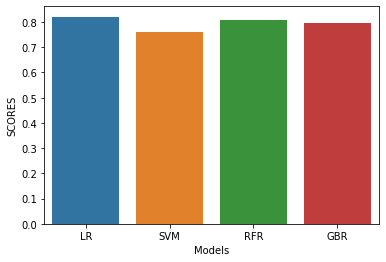

In [35]:
sns.barplot(data1['Models'],data1['SCORES'])

**now as we have already mentioned that this problem will be treated by both regression and classification now its time to shift to classification**

# CLASSIFICATION

In [36]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


**for implementing classification we have to convert chance of admit to categorical variable**

**we have set threshold = 0.8 if the value is greater than 0.8 then 1 otherwise 0**

In [37]:
y_train = [1 if value>0.8 else 0 for value in y_train]
y_test = [1 if value>0.8 else 0 for value in y_test]

In [38]:
import numpy as np

In [39]:
y_train = np.array(y_train)
y_test = np.array(y_test)

**Import the models**

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score # to know about the performance of different classification models

**Logistic R**

In [41]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
yc1 = lr.predict(X_test)
print(accuracy_score(y_test,yc1))

0.925


In [42]:
s = svm.SVC()
s.fit(X_train,y_train)
yc2 = s.predict(X_test)
print(accuracy_score(y_test,yc2))

0.925


In [43]:
k = KNeighborsClassifier()
k.fit(X_train,y_train)
yc3 = k.predict(X_test)
print(accuracy_score(y_test,yc3))

0.8875


In [44]:
r= RandomForestClassifier()
r.fit(X_train,y_train)
yc4 = r.predict(X_test)
print(accuracy_score(y_test,yc4))

0.925


In [45]:
g = GradientBoostingClassifier()
g.fit(X_train,y_train)
yc5 = g.predict(X_test)
print(accuracy_score(y_test,yc5))

0.975


**visualising again**

In [46]:
finalC = {'Models':['LR','SVM','KNC','RFC','GBC'],'SCORES':[accuracy_score(y_test,yc1),accuracy_score(y_test,yc2),accuracy_score(y_test,yc3),accuracy_score(y_test,yc4),accuracy_score(y_test,yc5)]}

In [47]:
data1 = pd.DataFrame(finalC)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='SCORES'>

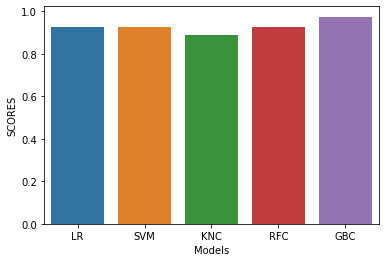

In [48]:
sns.barplot(data1['Models'],data1['SCORES'])

**now we save our best model that is Logistic Regression**

**we have to train our model on entire dataset**

In [49]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [50]:
X = data.drop('Chance of Admit ',axis=1)

In [51]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [52]:
y = data['Chance of Admit ']

**now lets convert y into categorical variable**

In [53]:
y  = [1 if value>0.8 else 0 for value in y]

In [54]:
y

[1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [55]:
y = np.array(y)

In [56]:
y

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

**lets scale x**

In [57]:
X = sc.fit_transform(X)

In [58]:
X

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

In [59]:
lr = GradientBoostingClassifier()
lr.fit(X,y)

GradientBoostingClassifier()

In [60]:
import joblib

In [61]:
joblib.dump(lr,'Admission_predict')

['Admission_predict']

In [62]:
model = joblib.load('Admission_predict')

In [63]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [64]:
model.predict(sc.transform([[200,340,3,4.5,4.5,9.00,1]]))

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

# GUI

In [65]:
from tkinter import*
import joblib
from sklearn.preprocessing import StandardScaler

In [ ]:
def prediction():
    v1 = float(t1.get())
    v2 = float(t2.get())
    v3 = float(t3.get())
    v4 = float(t4.get())
    v5 = float(t5.get())
    v6 = float(t6.get())
    v7 = float(t7.get())
    
    model = joblib.load('Admission_predict')
    result = model.predict(sc.transform([[v1,v2,v3,v4,v5,v6,v7]]))
    if result==1:
        label = Label(root,text="High Chance of getting admission").grid(row=31)
    else:
        label = Label(root,text="Less chances of getting admission").grid(row=31)
root = Tk()
root.title("Admission Jyotish")
label = Label(root,text="ADMISSION JYOITSH",fg="red").grid(row=0,columnspan=2)

t1 = Entry(root,width=350)
t1.grid(row=0,column=1)
t2 = Entry(root,width=350)
t2.grid(row=1,column=1)
t3 = Entry(root,width=350)
t3.grid(row=2,column=1)
t4 = Entry(root,width=350)
t4.grid(row=3,column=1)
t5 = Entry(root,width=350)
t5.grid(row=4,column=1)
t6 = Entry(root,width=350)
t6.grid(row=5,column=1)
t7 = Entry(root,width=350)
t7.grid(row=6,column=1)

Label(root, text="Enter your GRE score").grid(row=0,column=0)
Label(root, text = "Enter your TOEFL score").grid(row=1,column=0)
Label(root, text = "Enter Univeristy Rating").grid(row=2,column=0)
Label(root, text = "Enter SOP").grid(row=3,column=0)
Label(root, text = "Enter LOR").grid(row=4,column=0)
Label(root, text = "Enter your CGPA").grid(row=5,column=0)
Label(root, text = "Research").grid(row=6,column=0)

Button(root,text="Predict",command=prediction).grid(row=8,column=0)
mainloop()

                           
    

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



\